ARTI308 - Machine Learning

# Lab 3: Exploratory Data Analysis (EDA) - Telco Customer Churn

In this lab, we will apply EDA techniques to the **Telco Customer Churn** dataset.

Before building any predictive model, we must understand:

- What does each feature represent?
- Are there missing values or inconsistent entries?
- Are there outliers?
- What patterns exist between customer characteristics and churn?
- Which variables seem most related to churn?

If we do not understand the data, we cannot build a good model.

### Why EDA is Important

In real-world machine learning projects:

1. 70–80% of the time is spent on understanding and cleaning data
2. Only 20–30% is spent building models

**EDA helps us:**

- Detect errors
- Identify trends
- Discover relationships
- Make business decisions
- Understand which customers are more likely to leave (churn)


### Step 1: Import Libraries


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

pd.set_option('display.max_columns', None)


### Step 2: Load Dataset


In [36]:
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Step 3: Check Missing Values


In [37]:
print(df.isna())


      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0          False   False          False    False       False   False   
1          False   False          False    False       False   False   
2          False   False          False    False       False   False   
3          False   False          False    False       False   False   
4          False   False          False    False       False   False   
...          ...     ...            ...      ...         ...     ...   
7038       False   False          False    False       False   False   
7039       False   False          False    False       False   False   
7040       False   False          False    False       False   False   
7041       False   False          False    False       False   False   
7042       False   False          False    False       False   False   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  \
0            False          False            False           Fals

In [38]:
print(df.isna().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### Step 4: Check Duplicate Rows


In [39]:
duplicates = df.duplicated()

print("Number of duplicate rows:", duplicates.sum())

df[duplicates].head()


Number of duplicate rows: 0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### Step 5: Number of Rows and Columns


In [40]:
print("Shape (rows, columns): ", df.shape, "\n")

print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])


Shape (rows, columns):  (7043, 21) 

Number of rows:  7043
Number of columns:  21


### Step 6: Data Types of Columns


In [41]:
df.dtypes

customerID              str
gender                  str
SeniorCitizen         int64
Partner                 str
Dependents              str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
PaperlessBilling        str
PaymentMethod           str
MonthlyCharges      float64
TotalCharges            str
Churn                   str
dtype: object

### Step 7: Basic Cleaning (Convert Data Types)


In [42]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print(df.dtypes)
print("\nMissing values in TotalCharges:", df['TotalCharges'].isna().sum())


customerID              str
gender                  str
SeniorCitizen         int64
Partner                 str
Dependents              str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
PaperlessBilling        str
PaymentMethod           str
MonthlyCharges      float64
TotalCharges        float64
Churn                   str
dtype: object

Missing values in TotalCharges: 11


### Step 8: Descriptive Summary Statistics


In [43]:
df.describe(include='all')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,NaN


### Step 9: Univariate Analysis

We will first look at the distribution of key numerical variables.


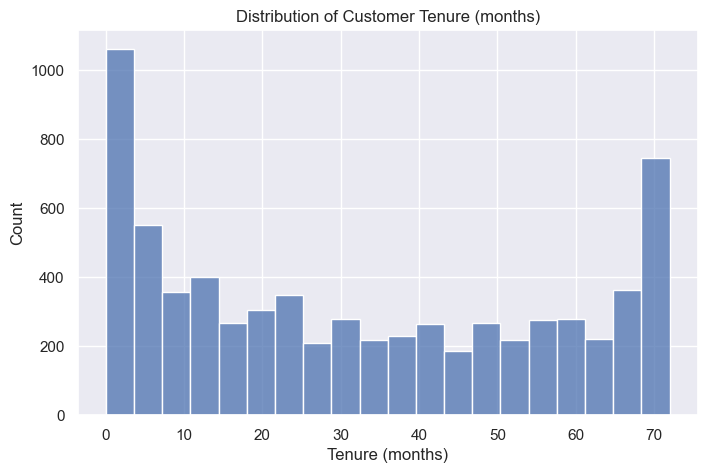

In [44]:
plt.figure(figsize=(8,5))
sns.histplot(df['tenure'], bins=20)
plt.title("Distribution of Customer Tenure (months)")
plt.xlabel("Tenure (months)")
plt.show()


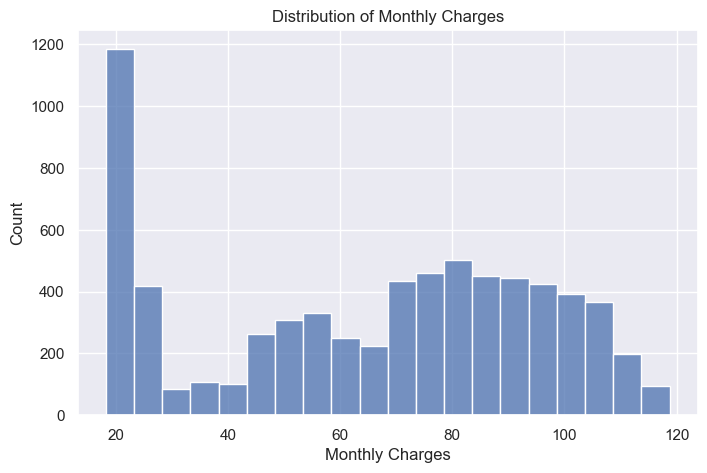

In [45]:
plt.figure(figsize=(8,5))
sns.histplot(df['MonthlyCharges'], bins=20)
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.show()


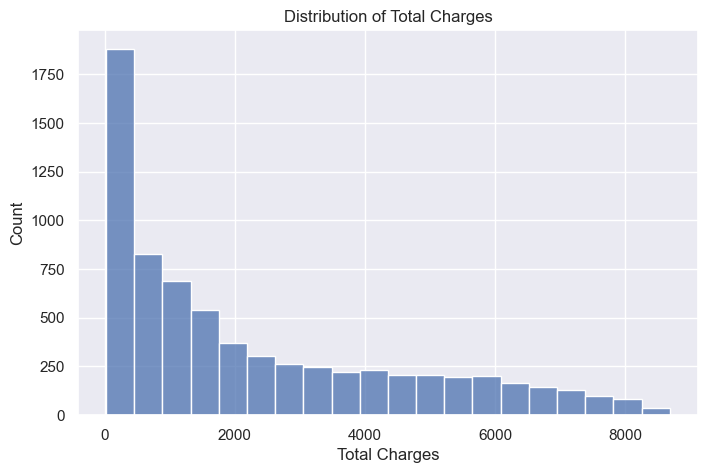

In [46]:
plt.figure(figsize=(8,5))
sns.histplot(df['TotalCharges'].dropna(), bins=20)
plt.title("Distribution of Total Charges")
plt.xlabel("Total Charges")
plt.show()


- **Tenure**: shows how long customers have stayed with the company.
- **MonthlyCharges**: shows typical monthly bills.
- **TotalCharges**: total amount paid by each customer over their lifetime.


## Bivariate Analysis

We now explore relationships between **Churn** and other variables.


### Churn Distribution


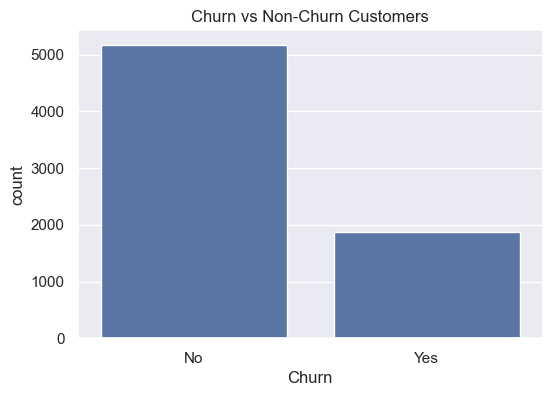

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [47]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn vs Non-Churn Customers")
plt.show()

churn_rate = df['Churn'].value_counts(normalize=True) * 100
churn_rate


### Monthly Charges by Churn


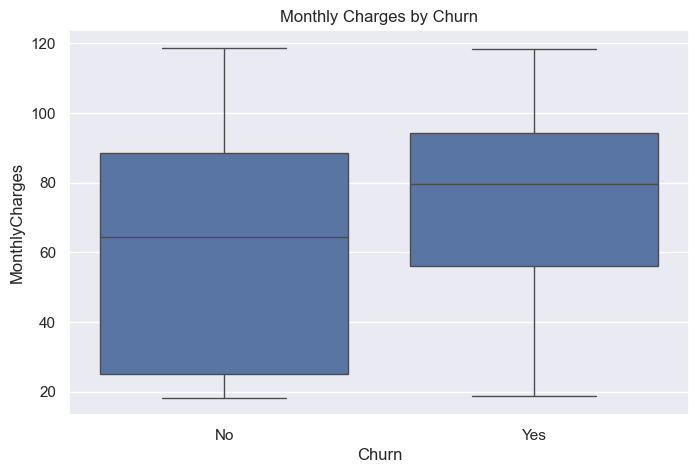

In [48]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn")
plt.show()


### Tenure by Churn


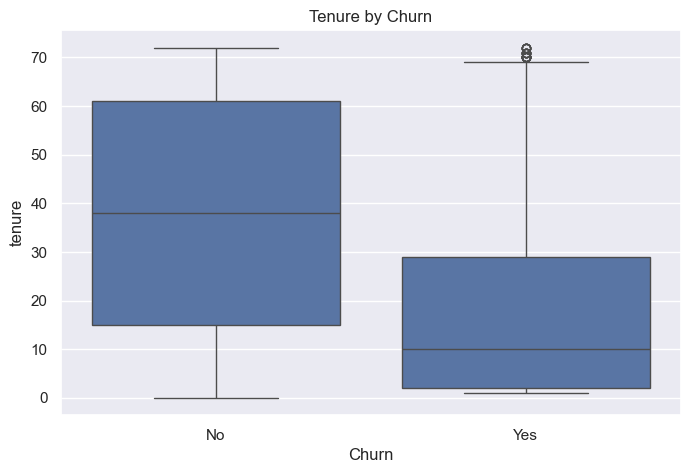

In [49]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure by Churn")
plt.show()


### Contract Type and Churn


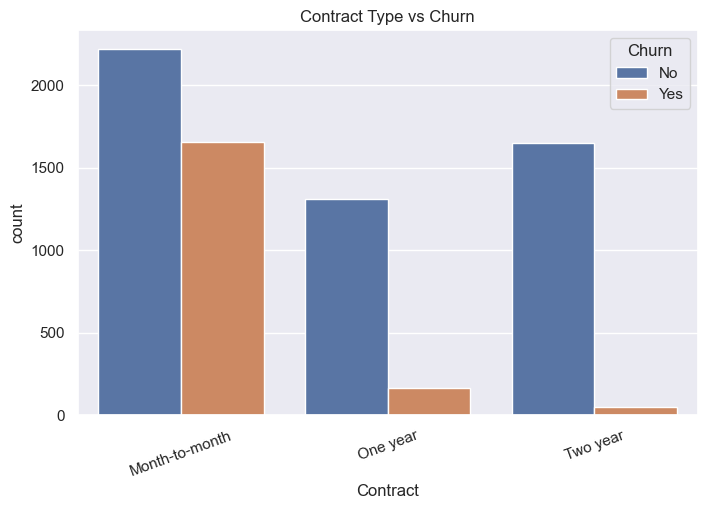

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=20)
plt.show()


### Correlation Matrix (Numerical Features)


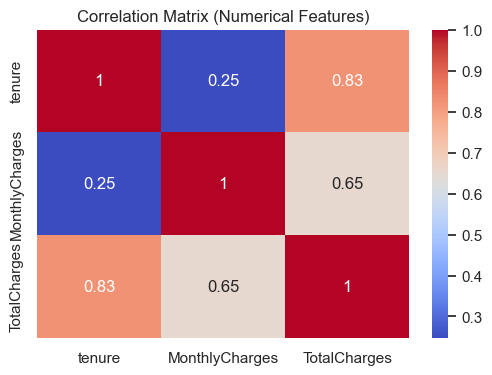

In [51]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


- **Correlation close to 1**: strong positive relationship.
- **Correlation close to -1**: strong negative relationship.
- **Correlation close to 0**: weak/no linear relationship.
